# Исследование цен на рынке недвижимости

Мотивация исследования: Анализ и прогноз цен на недвижимость.
Исследовательский вопрос: Есть ли связь между ценой дома и факторами, представленными в нашем исследовании. 
Исследовательская гипотеза: Количество спален положительно влияет на стоимость недвижимость.

Для начала импортируем необходимые для исследования библиотеки:
numpy - библиотека для математических вычислений;
pandas - библиотека для работы с табличными данными, их агрегации и анализа;
matplotlib - библиотека для работы с графиками
seaborn - вторая библиотека для работы с графиками

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Для исследования было решено взять датасет с [kaggle](https://www.kaggle.com/datasets/shree1992/housedata/data) о информацией о цене недвижимости, а также о различных факторах, которые эту цену могут образовывать. Посмотрим на первые 5 строк:

In [7]:
df = pd.read_csv('data.csv').convert_dtypes()
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4,2.5,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Теперь мы можем более подробно описать наши данные:
date: дата продажи
price: цена продажи
bedrooms: количество спален
bathrooms: количество ванных комнат
sqft_living: жилая площадь в квадратных футах
sqft_lot: площадь участка в квадратных футах
floors: количество этажей
waterfront: наличие выхода к воде
view: наличие обзора
condition: состояние
sqft_above: площадь над землей в квадратных футах
sqft_basement: площадь подвала в квадратных футах
yr_built: год постройки
yr_renovated: год реновации
street: улица
city: город
statezip: почтовый индекс
country: страна

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   string 
 1   price          4600 non-null   Float64
 2   bedrooms       4600 non-null   Int64  
 3   bathrooms      4600 non-null   Float64
 4   sqft_living    4600 non-null   Int64  
 5   sqft_lot       4600 non-null   Int64  
 6   floors         4600 non-null   Float64
 7   waterfront     4600 non-null   Int64  
 8   view           4600 non-null   Int64  
 9   condition      4600 non-null   Int64  
 10  sqft_above     4600 non-null   Int64  
 11  sqft_basement  4600 non-null   Int64  
 12  yr_built       4600 non-null   Int64  
 13  yr_renovated   4600 non-null   Int64  
 14  street         4600 non-null   string 
 15  city           4600 non-null   string 
 16  statezip       4600 non-null   string 
 17  country        4600 non-null   string 
dtypes: Float

# Анализ данных


В колонке price есть значения, равные 0, что может быть ошибкой или означать отсутствие данных о цене. Эти строки следует исключить из анализа, так как они могут исказить результаты.
Колонки bedrooms и bathrooms также имеют минимальное значение 0, что может быть ошибочным. Стоит проверить и, возможно, удалить эти строки.

In [15]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


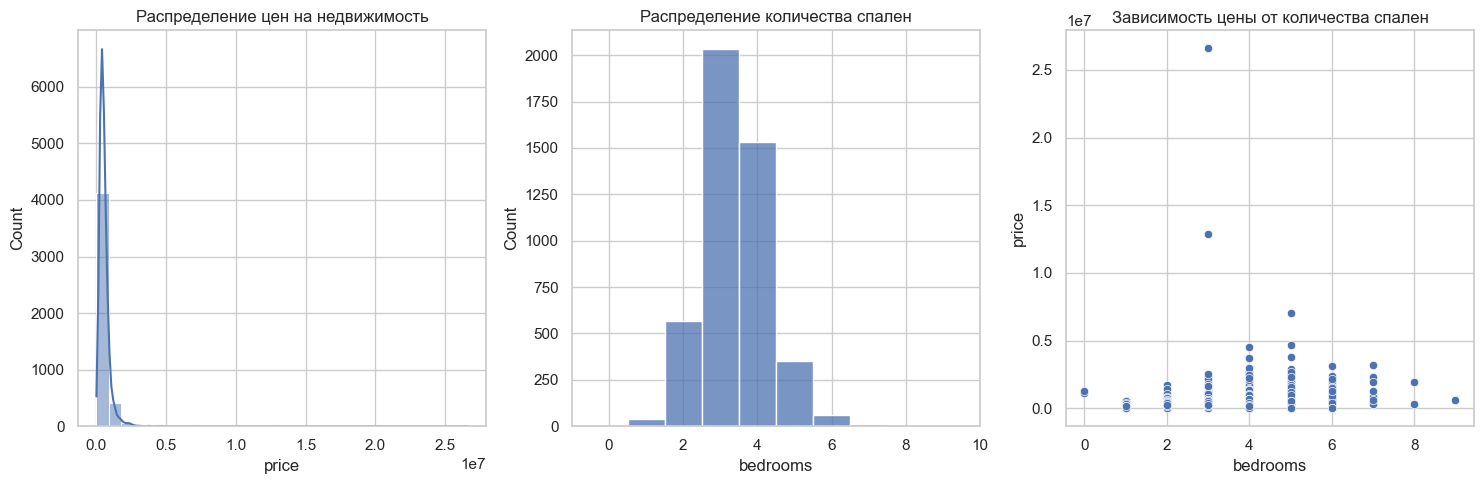

In [14]:

# Настройка стиля графиков
sns.set(style="whitegrid")

# Создание фигуры с несколькими подграфиками
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Гистограмма распределения цен
sns.histplot(df['price'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Распределение цен на недвижимость')

# Гистограмма количества спален
sns.histplot(df['bedrooms'], bins=range(1, int(df['bedrooms'].max()) + 1), ax=axes[1], kde=False, discrete=True)
axes[1].set_title('Распределение количества спален')

# Скаттер-плот цены от количества спален
sns.scatterplot(x='bedrooms', y='price', data=df, ax=axes[2])
axes[2].set_title('Зависимость цены от количества спален')

# Отображение всех графиков
plt.tight_layout()
plt.show()
